In [1]:
#Importando librerías
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import scipy.optimize as opt

In [2]:
#Cargando los datos
A=np.load('fit_exercise.npy')
x=A[0]
y=A[1]
sig=A[2]
sigma=0.05

In [12]:
#parámetros
#Número de pasos
N=10000
#Número de cadenas
c=4

# FUNCIONES

In [4]:
#Funciones
# funcion del modelo
def f(x, a, b):
    return a + b*x

# Likelihood
def llh(a,b):
    #return -0.5*np.sum((y - f(x, *theta))**2/(sig**2))
    return -0.5*np.sum(np.log(2*np.pi*sig**2)+(y - f(x,a,b))**2/(sig**2))#Con este ya funciona

def prior():
    if sigma <= 0:
        return 0.0
    return 1
    
# Posterior
def p(a,b):
    return llh(a,b)-np.log(prior())

# Generador de muestras
def sample(a,b,tasa):
    a_new=np.random.normal(a, sigma)
    b_new=np.random.normal(b,sigma)
    p_old = p(a,b)
    p_new = p(a_new,b_new)
    if p_new>p_old:
            a=a_new
            b=b_new
            tasa=tasa+1
    else:
            p_accept= p_new - p_old
            accept = np.log(np.random.rand())
            if accept< p_accept:
                a= a_new
                b= b_new
                tasa=tasa+1
   
    return a,b,tasa

#Generador de chain
def cadena(n):
    #Vector donde se guardan las nuevas coordenadas de a y se genera número aleatorio de inicio.
    ap=np.array([np.random.uniform(0, 7)])
    #Vector donde se guardan las nuevas coordenadas de b y se genera número aleatorio de inicio.
    bp=np.array([np.random.uniform(-3, 3)])
    #creo una variable para el número de aceptados y la inicilizo en cero 
    acep=0
    for i in range(1,n):
        aux1,aux2,aux3=sample(ap[i-1],bp[i-1],acep)
        ap=np.append(ap,aux1)
        bp=np.append(bp,aux2)
        acep=aux3
    #porcentaje de aceptación
    porc=(acep/n)*100
    return ap,bp,porc

#Está función recibe el número de cadenas y el número de pasos
def multicad(ch,l):
    MA=np.empty((ch,l))
    MB=np.empty((ch,l))
    PA=np.zeros(ch)
    for i in range(ch):
        MA[i],MB[i],PA[i]=cadena(l)
    
    return MA,MB,PA 

#Gráfica de los caminadores 
def cam(A,B):
    for i in range(c):
        plt.plot(A[i],B[i],'.',label='Cadena %s'%(i+1))
        plt.plot(A[i][0],B[i][0],'<')
    #plt.plot(matA[i][0],matB[i][0],'<',label='Punto inical cadena %s'%(i+1))
    plt.legend()
    plt.xlabel('a')
    plt.ylabel('b')
    plt.grid(True)
    plt.show()

#Gráfica para generar la línea recta del ajuste
def line(A,B):
    #Línea que se genera con los datos
    #ymodel=postp[N][0]+postp[N][1]*x
    plt.plot(x,y,'g.')
    for i in range (c):
        plt.plot(x,matA[i][N-1]+matB[i][N-1]*x,'--',label='Cadena %s'%(i+1))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

# Cálculos

In [13]:
matA,matB,t_acep=multicad(c,N)

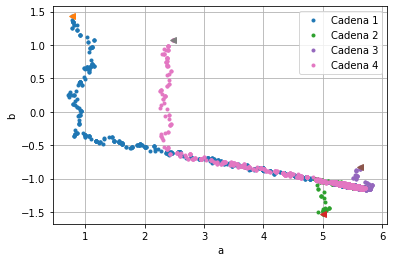

In [14]:
cam(matA,matB)

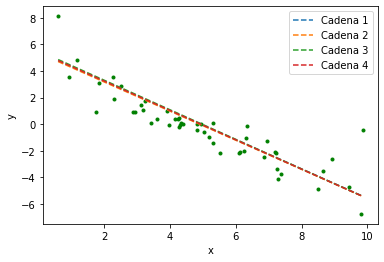

In [15]:
line(matA,matB)

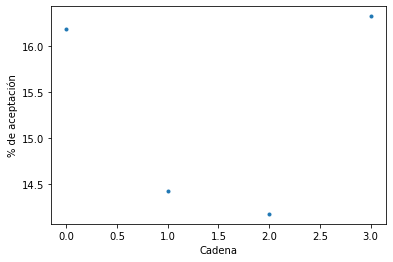

In [16]:
#Gráfica de porcentaje de aceptación 
plt.plot(t_acep,'.')
plt.xlabel('Cadena')
plt.ylabel('% de aceptación')
plt.show()

# Diagnóstico de Gelman-Rubin

In [17]:
#Función para el diagnostico de Gelman-Rubin
def GR(A):
    aux=0 #Variable auxiliar
    aux2=0 #Variable auxiliar
    mu=A.mean() #valor medio del parámetro por todas las cadenas
    for i in range (c):
        mean=A[i].mean() #media del valor por cadena
        aux=(1/(N-1))*np.sum((A[i]-mean)**2)# s_i^2 
        aux2=(mean-mu)**2 #B/n
        aux+=aux #sumando los valores de s_i^2 para obtener s^2
        aux2+=aux2
    s2=(1/c)*aux #valor final de s^2
    Bn=(1/(c-1))*aux2 #valor final de B/n
    sigma2=((N-1)/N)*s2+Bn # sigma^2
    R=np.sqrt(sigma2/s2) #parámetro R
    return R 

In [18]:
#valor de R para el parámetro A
Ra=GR(matA)
Ra

1.0046927812823618

In [19]:
#valor de R para el parámetro B
Rb=GR(matB)
Rb

1.0025190016985155